# Credit Card Fraud Detection using Machine Learning in Python

Importing the Dependencies

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv(r'E:\PROJECTS\ML project\Credit Card Fraud Detection using Machine Learning in Python\creditcard.csv')

<IPython.core.display.Javascript object>

In [33]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [35]:
print(df[df['Class'] == 1])

            Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
df.shape

(284807, 31)

In [19]:
normal = 100*len(df.loc[df['Class']==0,'Class'])/len(df['Class'])
fraud = 100*len(df.loc[df['Class']==1,'Class'])/len(df['Class'])
print(f'Percentage of Normal Transaction is {normal}')
print(f'Percentage of Fraudulent Transaction is {fraud}')

Percentage of Normal Transaction is 99.827251436938
Percentage of Fraudulent Transaction is 0.1727485630620034


0 --> Normal Transaction

1 --> fraudulent transaction

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

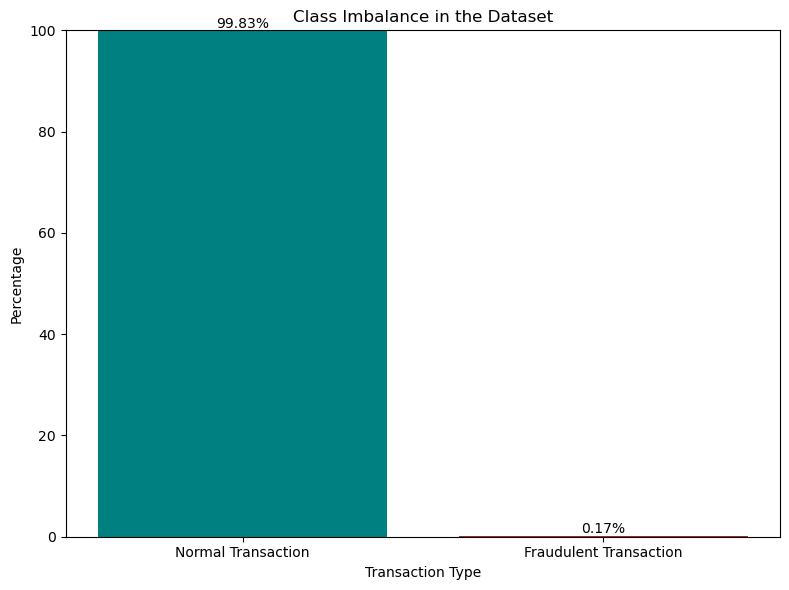

In [16]:
# Data
labels = ['Normal Transaction', 'Fraudulent Transaction']
percentages = [normal, fraud]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['teal', 'brown'])
plt.xlabel('Transaction Type')
plt.ylabel('Percentage')
plt.title('Class Imbalance in the Dataset')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100 for percentages
# plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Add percentage labels above the bars
for i, p in enumerate(percentages):
    plt.annotate(f'{p:.2f}%', (labels[i], p), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.savefig('class_imbalance_plot.png')
plt.show()

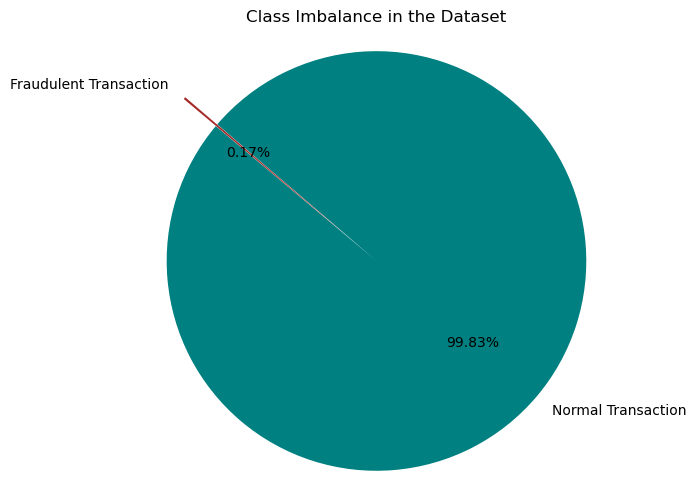

In [34]:
# Data
labels = ['Normal Transaction', 'Fraudulent Transaction']
percentages = [normal, fraud]
colors = ['teal', 'brown']
explode = (0, 0.2)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%1.2f%%', colors=colors, startangle=140, explode=explode)
plt.title('Class Imbalance in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


In [40]:
# separating the data for analysis

normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [42]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [43]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [44]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [45]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


This dataset is heavily imbalanced

Build a sample dataset containing similar distribution of Normal Transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

So, we take 492 samples of Normal Transactions here 

In [47]:
normal_sample = normal.sample(n = 492)

Concatenating Normal and Fraudulent Transactions DataFrames

In [49]:
new_df = pd.concat([normal_sample, fraud], axis = 0)

<IPython.core.display.Javascript object>

In [50]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
119248,75383.0,1.458489,-1.029401,0.693315,-1.387707,-1.519972,-0.442593,-1.148658,-0.042358,-1.757268,...,-0.339997,-0.589168,0.207846,0.030966,0.061662,-0.381033,0.060021,0.026754,13.58,0
213254,139178.0,-9.105029,-6.695368,-2.914536,2.597654,2.264893,0.922614,0.066315,-0.768018,2.506207,...,-1.714187,1.107236,0.911875,-0.715010,-2.112717,-1.137163,-2.199345,2.786585,31.00,0
261931,160245.0,-1.356031,-0.117869,1.004786,-1.529115,-0.291574,-0.025193,0.128382,0.527664,-1.840436,...,-0.230170,-0.687723,-0.007104,0.752004,0.464166,0.577691,-0.171889,-0.070655,108.30,0
251742,155478.0,-0.499755,0.155719,0.372154,-0.685113,1.315159,-0.826923,0.580198,0.000713,-0.406076,...,-0.086944,-0.397415,0.119228,-0.475519,-0.846243,0.092666,0.112146,0.194802,4.49,0
212368,138826.0,-4.128438,1.309217,-2.850607,0.217606,-9.538018,7.743086,4.063443,-11.151005,0.418429,...,-0.465356,-2.317761,-9.068391,0.166759,-1.819190,-0.487851,3.213250,-0.862401,2756.03,0


In [51]:
new_df.shape

(984, 31)

In [52]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [56]:
# class distribution after resampling

new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [54]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92022.778455,0.102037,-0.008877,0.029000,-0.006344,-0.024631,0.067631,0.105265,0.005947,0.032451,...,0.003761,-0.010187,0.014092,-0.033566,0.016874,-0.006528,-0.013350,-0.030103,-0.007343,102.718211
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### spliting and training 

In [57]:
X = new_df.drop(columns = 'Class', axis = 1)
y = new_df['Class']

In [58]:
print(X, y)

            Time        V1        V2        V3        V4        V5        V6  \
119248   75383.0  1.458489 -1.029401  0.693315 -1.387707 -1.519972 -0.442593   
213254  139178.0 -9.105029 -6.695368 -2.914536  2.597654  2.264893  0.922614   
261931  160245.0 -1.356031 -0.117869  1.004786 -1.529115 -0.291574 -0.025193   
251742  155478.0 -0.499755  0.155719  0.372154 -0.685113  1.315159 -0.826923   
212368  138826.0 -4.128438  1.309217 -2.850607  0.217606 -9.538018  7.743086   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7         V8        V9  

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state = 42,
                                                   stratify = y,
                                                   test_size = 0.2)

<IPython.core.display.Javascript object>

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### Logistic Regression

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

LogisticRegression()

#### Accuracy Score 

In [66]:
# training accuracy

X_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(X_train_pred, y_train)

In [70]:
print('Accuracy on Training data : ', train_accuracy)

Accuracy on Training data :  0.9301143583227446


In [68]:
# testing accuracy

X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(X_test_pred, y_test)

In [71]:
print('Accuracy on Testing data : ', test_accuracy)

Accuracy on Testing data :  0.949238578680203
